In [147]:
import galsim
import numpy as np
import matplotlib.pyplot as plt

In [148]:
lam=692
aper = galsim.Aperture(diam=8.1, lam=lam, obscuration=1.024/7.7, screen_list=optics)

In [149]:
aberrations = np.zeros(12)
aberrations[4] = 0.5 #defocus
aberrations[5] = 0.65 #astig1
aberrations[6] = -0.25 #astig2
aberrations[7] = -0.55 #coma1
aberrations[8] = 0.25 #coma2
aberrations[9] = 0.25 #tref1
aberrations[10] = -0.5 #tref2
aberrations[11] = 0.25 #spher

shapes = np.zeros((62,2))
for i in range(62):
    optics = galsim.PhaseScreenList(galsim.AtmosphericScreen(altitude=0.5, screen_size=25, vx=3.4, vy=1.2),
                                    galsim.AtmosphericScreen(altitude=20, screen_size=25, vx=2.4, vy=4.2),
                                    galsim.OpticalScreen(diam=8.1, obscuration=1.024/8.1, aberrations=aberrations))
    psfIm = galsim.PhaseScreenPSF(optics, lam, exptime=15, aper=aper, flux=10**4).drawImage(scale=.01, nx=256, ny=256)
    moments = galsim.hsm.FindAdaptiveMom(psfIm).observed_shape
    shapes[i] = [moments.g1, moments.g2]

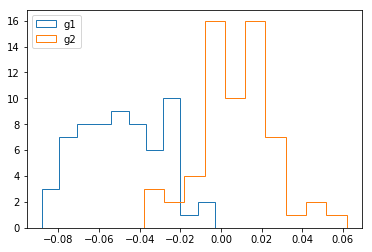

In [150]:
plt.figure()
plt.hist(shapes[:,0], histtype='step', label='g1')
plt.hist(shapes[:,1], histtype='step', label='g2')
plt.legend()
plt.show()

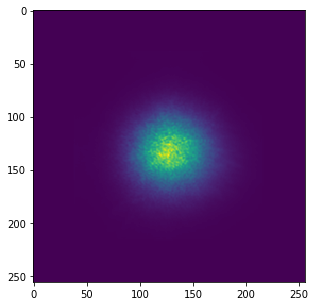

In [135]:
plt.figure(figsize=(5,5))
plt.imshow(psfIm.array)
# plt.colorbar()
plt.show()

In [63]:
galsim.OpticalPSF?

Init signature:
galsim.OpticalPSF(
    lam_over_diam=None,
    lam=None,
    diam=None,
    tip=0.0,
    tilt=0.0,
    defocus=0.0,
    astig1=0.0,
    astig2=0.0,
    coma1=0.0,
    coma2=0.0,
    trefoil1=0.0,
    trefoil2=0.0,
    spher=0.0,
    aberrations=None,
    annular_zernike=False,
    aper=None,
    circular_pupil=True,
    obscuration=0.0,
    interpolant=None,
    oversampling=1.5,
    pad_factor=1.5,
    ii_pad_factor=4.0,
    flux=1.0,
    nstruts=0,
    strut_thick=0.05,
    strut_angle=coord.Angle(0.0, coord.radians),
    pupil_plane_im=None,
    pupil_plane_scale=None,
    pupil_plane_size=None,
    pupil_angle=coord.Angle(0.0, coord.radians),
    scale_unit=coord.arcsec,
    gsparams=None,
    _force_stepk=0.0,
    _force_maxk=0.0,
    suppress_warning=False,
    geometric_shooting=False,
)
Docstring:     
A class describing aberrated PSFs due to telescope optics.  Its underlying implementation
uses an InterpolatedImage to characterize the profile.

The diffraction 

In [91]:
galsim.AtmosphericScreen?

Init signature:
galsim.AtmosphericScreen(
    screen_size,
    screen_scale=None,
    altitude=0.0,
    r0_500=0.2,
    L0=25.0,
    vx=0.0,
    vy=0.0,
    alpha=1.0,
    time_step=None,
    rng=None,
    suppress_warning=False,
)
Docstring:     
An atmospheric phase screen that can drift in the wind and evolves ("boils") over time.  The
initial phases and fractional phase updates are drawn from a von Karman power spectrum, which is
defined by a Fried parameter that effectively sets the amplitude of the turbulence, and an outer
scale beyond which the turbulence power flattens.

AtmosphericScreen delays the actual instantiation of the phase screen array in memory until it
is used for either drawing a PSF or querying the wavefront or wavefront gradient.  This is to
facilitate automatic truncation of the screen power spectrum depending on the use case.  For
example, when drawing a PhaseScreenPSF using Fourier methods, the entire power spectrum should
generally be used.  On the other hand

In [102]:
galsim.PhaseScreenPSF?

Init signature:
galsim.PhaseScreenPSF(
    screen_list,
    lam,
    t0=0.0,
    exptime=0.0,
    time_step=0.025,
    flux=1.0,
    theta=(coord.Angle(0.0, coord.radians), coord.Angle(0.0, coord.radians)),
    interpolant=None,
    scale_unit=coord.arcsec,
    ii_pad_factor=4.0,
    suppress_warning=False,
    geometric_shooting=True,
    aper=None,
    second_kick=None,
    kcrit=0.2,
    gsparams=None,
    _force_stepk=0.0,
    _force_maxk=0.0,
    _bar=None,
    **kwargs,
)
Docstring:     
A PSF surface brightness profile constructed by integrating over time the instantaneous PSF
derived from a set of phase screens and an aperture.

There are two equivalent ways to construct a PhaseScreenPSF given a PhaseScreenList:
    >>> psf = screen_list.makePSF(...)
    >>> psf = PhaseScreenPSF(screen_list, ...)

Computing a PSF from a phase screen also requires an Aperture be specified.  This can be done
either directly via the `aper` keyword, or by setting a number of keywords that will be p